In [3]:
# Анализ зарплат по уровню опыта

## Индивидуальное задание вариант 12

In [ ]:
1. Загрузка данных из HDFS
Сначала подключимся к Hadoop и загрузим данные из HDFS.

In [7]:
pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import subprocess
import os

# Настройка отображения
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

# Увеличение размера графиков
plt.rcParams['figure.figsize'] = (12, 8)

In [10]:
import os
import subprocess
import pandas as pd

# Загрузка данных из HDFS
print("Загрузка данных из HDFS...")

# Путь к данным в HDFS (правильный путь)
hdfs_path = "/user/hadoop/input/salary_data.csv"
local_path = "/opt/salary_data.csv"

# Скачиваем файл из HDFS
try:
    # Команда для скачивания из HDFS
    hdfs_download_cmd = f"hdfs dfs -get {hdfs_path} {local_path}"
    print(f"Выполнение команды: {hdfs_download_cmd}")
    
    # Задаем JAVA_HOME, так как Jupyter может его не видеть
    env = dict(os.environ, **{'JAVA_HOME': '/usr/lib/jvm/java-11-openjdk-amd64'})
    result = subprocess.run(hdfs_download_cmd, shell=True, capture_output=True, text=True, cwd="/opt", env=env)
    
    if result.returncode == 0:
        print(f"Данные успешно загружены из HDFS: {hdfs_path}")
    else:
        print(f"Ошибка при загрузке из HDFS: {result.stderr}")
        print("Попытка найти файл локально...")
        local_path = "/opt/data/salary_data.csv"

    # Проверяем наличие файла
    if not os.path.exists(local_path):
        print(f"Файл не найден в {local_path}. Используем альтернативный путь...")
        # Исправлена синтаксическая ошибка
        local_path = "salary_data.csv"
        
except Exception as e:
    print(f"Ошибка при выполнении subprocess: {e}")
    print("Попытка использовать локальный файл...")
    local_path = "/opt/data/salary_data.csv"

# Проверяем наличие файла перед загрузкой
if not os.path.exists(local_path):
    print("Файл не найден. Пробуем последний вариант...")
    local_path = "salary_data.csv"

# Финальная проверка и загрузка данных
if os.path.exists(local_path):
    df = pd.read_csv(local_path, low_memory=False)
    print(f"Размер датасета: {df.shape}")
    print(f"Данные успешно загружены из {local_path}")
    print(df.head())
else:
    print(f"ОШИБКА: Файл database.csv не найден!")
    print(f"Искали по следующим путям:")
    print(f"  - /opt/database.csv (из HDFS)")
    print(f"  - /opt/data/database.csv (локальный)")
    print(f"  - database.csv (в текущей директории)")
    df = pd.DataFrame()  # Создаем пустой DataFrame чтобы не было ошибки

Загрузка данных из HDFS...
Выполнение команды: hdfs dfs -get /user/hadoop/input/salary_data.csv /opt/salary_data.csv
Данные успешно загружены из HDFS: /user/hadoop/input/salary_data.csv
Размер датасета: (2050000, 12)
Данные успешно загружены из /opt/salary_data.csv
   Unnamed: 0  work_year experience_level employment_type           job_title  \
0           1       2020               EN              PT   Big Data Engineer   
1           2       2024               EX              FT      Data Scientist   
2           3       2021               EX              CT        Head of Data   
3           4       2023               SE              PT  Research Scientist   
4           5       2022               SE              FT        Head of Data   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   2428666             INR          29143                 DE           100   
1    204208             EUR         224628                 PL             0   
2    56227

In [11]:
# Очистка данных
df_clean = df.copy()
df_clean = df_clean[df_clean['salary'].notna()]
df_clean['experience_level'] = df_clean['experience_level'].fillna('Unknown')

print(f"Количество строк: {len(df_clean)}")
print(f"Уровни опыта: {df_clean['experience_level'].unique()}")

Количество строк: 2050000
Уровни опыта: ['EN' 'EX' 'SE' 'MI']


In [ ]:
2. Анализ зарплат по уровню опыта

In [14]:
# Группировка по уровню опыта и вычисление средней зарплаты
salary_by_experience = df_clean.groupby('experience_level')['salary_in_usd'].agg(['mean', 'count']).reset_index()
salary_by_experience.columns = ['Experience_Level', 'Mean_Salary', 'Count']
salary_by_experience['Mean_Salary'] = salary_by_experience['Mean_Salary'].round(2)
salary_by_experience = salary_by_experience.sort_values('Mean_Salary', ascending=False)
 
print("Средняя зарплата по уровням опыта:")
print(salary_by_experience)

Средняя зарплата по уровням опыта:
  Experience_Level  Mean_Salary   Count
1               EX    303518.13  512624
3               SE    162488.23  512373
2               MI     96452.92  511905
0               EN     60703.01  513098


In [18]:
# Результат
max_experience = salary_by_experience.iloc[0]
print(f"Уровень опыта с максимальной средней зарплатой: {max_experience['Experience_Level']}")
print(f"Средняя зарплата для данного уровня опыта: {max_experience['Mean_Salary']:.2f}$")
print(f"Количество специалистов данного уровня опыта: {int(max_experience['Count'])}")

Уровень опыта с максимальной средней зарплатой: EX
Средняя зарплата для данного уровня опыта: 303518.13$
Количество специалистов данного уровня опыта: 512624


In [ ]:
3. Визуализация

In [21]:
!pwd

/opt


In [22]:
%pip install hdfs

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for hdfs: filename=hdfs-2.7.3-py3-none-any.whl size=34321 sha256=66393635d9dd9b8de7fb6fa10c1f4339cff4b215372ead09da2bae08499a461f
  Stored in directory: /root/.cache/pip/wheels/68/dd/29/c1a590238f9ebbe4f7ee9b3583f5185d0b9577e23f05c990eb
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13704 sha256=69ac0919b94e925ac79b1c4f445e8fa1918ec06064611632d08397ebf93d4d86
  Stored in directory: /root/.cache/pip/wheels/56/ea/58/ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built hdfs docopt
Note: you may need to restart the kernel to use updated packages.


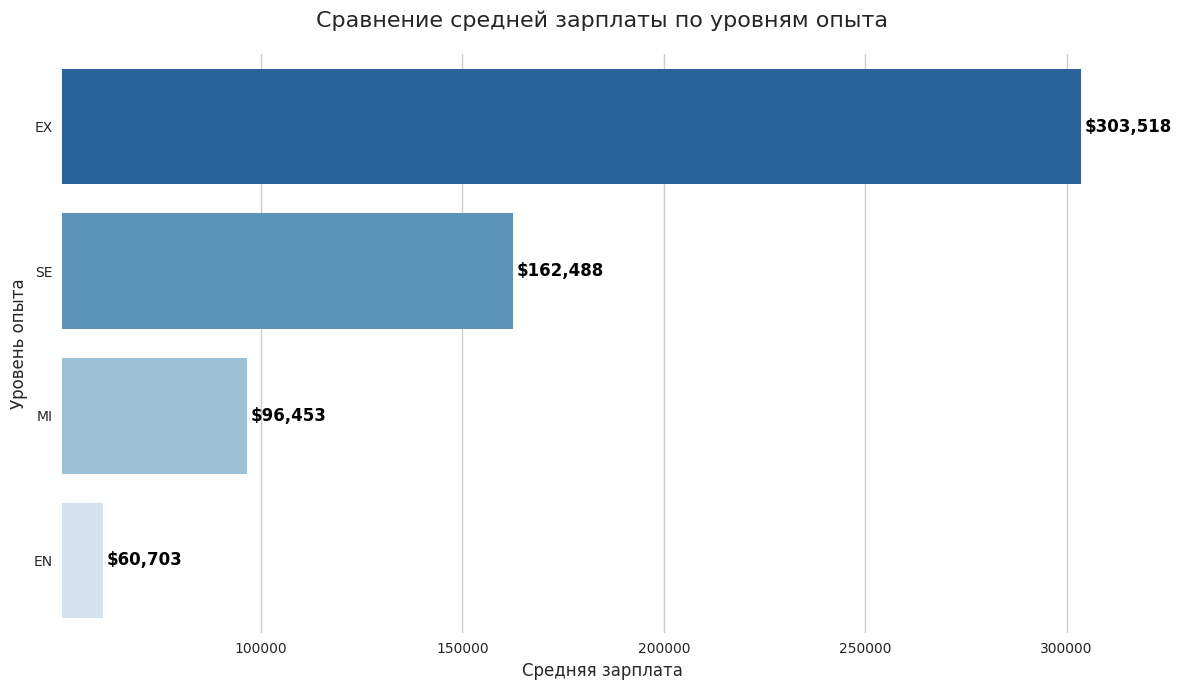

График успешно перезаписан в HDFS по пути: /user/hadoop/results/salary_by_experience.png


In [61]:
import io
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from hdfs import InsecureClient
 
# --- 1. Подготовка данных и сортировка ---
df_sorted = salary_by_experience.sort_values('Mean_Salary', ascending=False)
 
# --- 2. Создание графика ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 7))
 
ax = sns.barplot(
    x='Mean_Salary',
    y='Experience_Level',
    hue='Experience_Level',
    data=df_sorted,
    palette='Blues_r',
    legend=False
)
 
# "Приближаем" ось X для акцентирования разницы
min_val = df_sorted['Mean_Salary'].min()
plt.xlim(left=min_val - 10000)

# Добавляем метки со значениями
for bar in ax.patches:
    ax.text(
        bar.get_width() + 1000,
        bar.get_y() + bar.get_height() / 2,
        f'${bar.get_width():,.0f}',
        va='center', ha='left',
        fontsize=12, color='black',
        weight='bold'
    )
 
# Настройка заголовков и осей
plt.title('Сравнение средней зарплаты по уровням опыта', fontsize=16, pad=20)
plt.xlabel('Средняя зарплата', fontsize=12)
plt.ylabel('Уровень опыта', fontsize=12)
sns.despine(left=True, bottom=True)
plt.tight_layout()
 
# --- 3. Сохранение графика в буфер памяти ---
buffer = io.BytesIO()
plt.savefig(buffer, format='png', dpi=300)
# Показываем график в ноутбуке
plt.show()

buffer.seek(0)
 
# --- 4. Подключение к HDFS и перезапись файла ---
hdfs_path = '/user/hadoop/results/salary_by_experience.png'

# Подключаемся к HDFS
client = InsecureClient('http://hadoop:9870', user='root')
 
# Записываем данные из буфера в HDFS с флагом перезаписи
with client.write(hdfs_path, overwrite=True) as writer:
    writer.write(buffer.getvalue())
 
print(f"График успешно перезаписан в HDFS по пути: {hdfs_path}")

Топ-3 зарплаты:
                  Job_Title  Mean_Salary_USD
0  Principal Data Scientist        218069.49
1      Data Science Manager        217278.57
2              Head of Data        217263.72


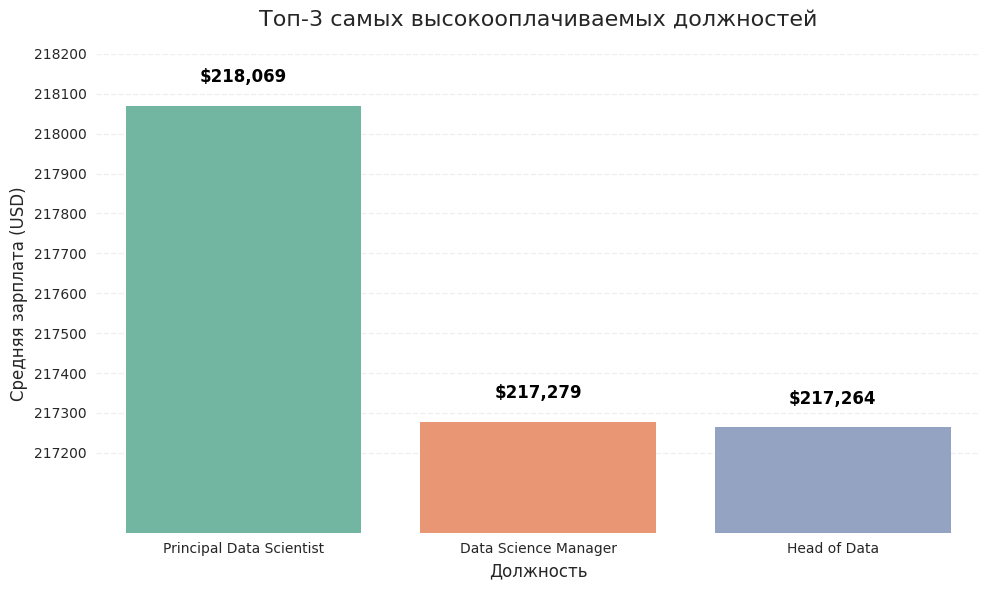

График успешно перезаписан в HDFS по пути: /user/hadoop/results/top_3_jobs.png


In [63]:
# --- 1. Подготовка данных ---
top_jobs = df_clean.groupby('job_title')['salary_in_usd'].mean().nlargest(3)
top_jobs_df = top_jobs.reset_index()
top_jobs_df.columns = ['Job_Title', 'Mean_Salary_USD']
top_jobs_df['Mean_Salary_USD'] = top_jobs_df['Mean_Salary_USD'].round(2)
top_jobs_sorted = top_jobs_df.sort_values('Mean_Salary_USD', ascending=False)
 
print("Топ-3 зарплаты:")
print(top_jobs_sorted)
 
# --- 2. Создание графика ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))
 
ax = sns.barplot(
    x='Job_Title',
    y='Mean_Salary_USD',
    hue='Job_Title',
    data=top_jobs_sorted,
    palette='Set2',
    legend=False
)
 
plt.ylim(bottom=217000, top=218200)
 
# Добавляем метки со значениями
for i, bar in enumerate(ax.patches):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 50, 
        f'${bar.get_height():,.0f}',
        va='bottom', ha='center',
        fontsize=12, color='black',
        weight='bold'
    )
 
# Настройка заголовков и осей
plt.title('Топ-3 самых высокооплачиваемых должностей', fontsize=16, pad=20)
plt.xlabel('Должность', fontsize=12)
plt.ylabel('Средняя зарплата (USD)', fontsize=12)
plt.xticks(rotation=0)
 
plt.grid(True, axis='y', alpha=0.3, linestyle='--')
 
plt.yticks(np.arange(217200, 218250, 100))
 
sns.despine(left=True, bottom=True)
plt.tight_layout()
 
# --- 3. Сохранение графика в буфер памяти ---
buffer = io.BytesIO()
plt.savefig(buffer, format='png', dpi=300)
plt.show()
buffer.seek(0)
 
# --- 4. Подключение к HDFS и перезапись файла ---
hdfs_path = '/user/hadoop/results/top_3_jobs.png'
 
# Подключаемся к HDFS
client = InsecureClient('http://hadoop:9870', user='root')
 
# Записываем данные из буфера в HDFS с флагом перезаписи
with client.write(hdfs_path, overwrite=True) as writer:
    writer.write(buffer.getvalue())
 
print(f"График успешно перезаписан в HDFS по пути: {hdfs_path}")

Средние зарплаты по годам:
   Year  Mean_Salary_USD
0  2020        156074.36
1  2021        155976.79
2  2022        155500.56
3  2023        155621.64
4  2024        155768.94


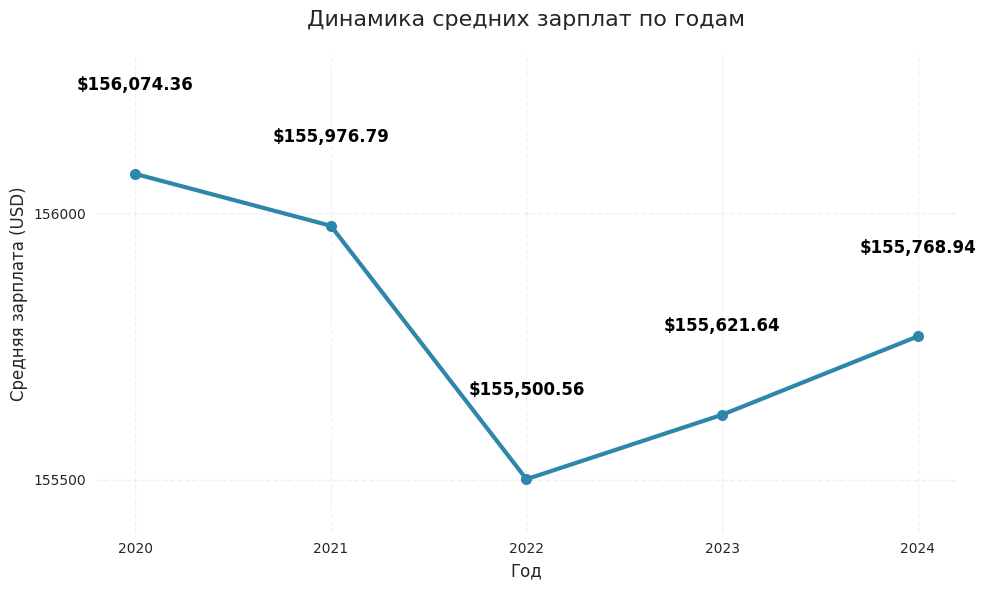

График успешно перезаписан в HDFS по пути: /user/hadoop/results/salary_by_year.png


In [78]:
# --- 1. Подготовка данных ---
salary_by_year = df_clean.groupby('work_year')['salary_in_usd'].mean().reset_index()
salary_by_year.columns = ['Year', 'Mean_Salary_USD']
salary_by_year['Mean_Salary_USD'] = salary_by_year['Mean_Salary_USD'].round(2)
salary_by_year_sorted = salary_by_year.sort_values('Year', ascending=True)
 
print("Средние зарплаты по годам:")
print(salary_by_year_sorted)
 
# --- 2. Создание линейчатой диаграммы ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))
 
# Создаем линейчатую диаграмму
plt.plot(salary_by_year_sorted['Year'], salary_by_year_sorted['Mean_Salary_USD'], 
         marker='o', linewidth=3, markersize=8, color='#2E86AB')
 
# Шкалирование для узкого диапазона 155-156 тысяч
min_salary = salary_by_year_sorted['Mean_Salary_USD'].min()
max_salary = salary_by_year_sorted['Mean_Salary_USD'].max()
 
# Очень узкий диапазон для подчеркивания разницы
plt.ylim(155400, 156300)
 
# Добавляем метки со значениями
for i, (year, salary) in enumerate(zip(salary_by_year_sorted['Year'], salary_by_year_sorted['Mean_Salary_USD'])):
    plt.text(year, salary + 150, f'${salary:,.2f}', 
             ha='center', va='bottom', fontsize=12, weight='bold', color='black')
 
# Настройка заголовков и осей
plt.title('Динамика средних зарплат по годам', fontsize=16, pad=20)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Средняя зарплата (USD)', fontsize=12)
 
# Улучшаем сетку для лучшего восприятия разницы
plt.grid(True, alpha=0.3, linestyle='--')
 
# Частые деления на оси Y для точного сравнения
plt.xticks(salary_by_year_sorted['Year'])
plt.yticks(np.arange(155500, 156500, 500))
 
sns.despine(left=True, bottom=True)
plt.tight_layout()
 
# --- 3. Сохранение графика в буфер памяти ---
buffer = io.BytesIO()
plt.savefig(buffer, format='png', dpi=300)
# Показываем график в ноутбуке
plt.show()
# "Перематываем" буфер в начало для чтения
buffer.seek(0)
 
# --- 4. Подключение к HDFS и перезапись файла ---
hdfs_path = '/user/hadoop/results/salary_by_year.png'
 
# Подключаемся к HDFS
client = InsecureClient('http://hadoop:9870', user='root')
 
# Записываем данные из буфера в HDFS с флагом перезаписи
with client.write(hdfs_path, overwrite=True) as writer:
    writer.write(buffer.getvalue())
 
print(f"График успешно перезаписан в HDFS по пути: {hdfs_path}")